# Managing input files 
In this notebook we will see how to load and correctly prepare the data for the computation of the Sea level equation resolution.

In [89]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt

## First load the ice6G data
We choose to use the ICE6G model in our code as example. This model is not the only one existing there is ICE5G and ICE7G. The input data are of the shape, 

In [90]:
data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/ice6G122k') #load the file, can be modified to load an other file.
ice_in=data['ice6g']
ice_time=data['ice_time']
ice_time=ice_time.squeeze()
ice_lon =data['ice_long'].squeeze()
ice_lat =data['ice_lat'].squeeze()[::-1]
# The ice is not in the good shape. We have to derivate it : 
ice_in=np.diff(ice_in.T,axis=0)

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_12268\416785474.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


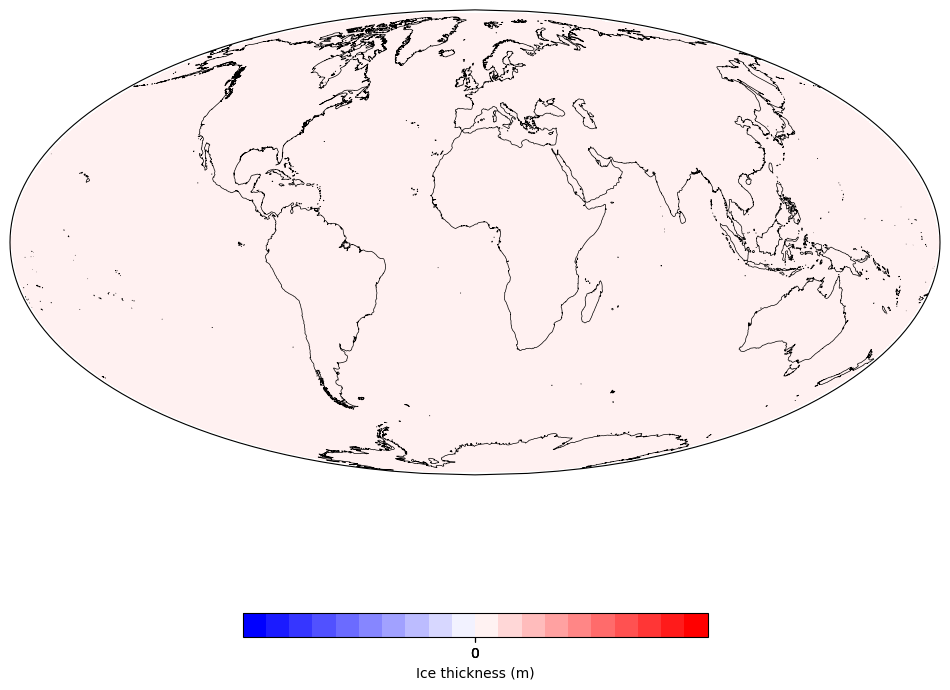

In [91]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors
ind=-1
cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(ice_in[ind,:,:], origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([ice_in[ind,:,:].min(), 0, ice_in[ind,:,:].max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [92]:
fig.savefig('original_ice_thickness.pdf')

In [93]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=0,step=-step)
maxdeg=64 # define the maximum degree for spherical harmonics.

ice_time_grid=TIME_GRID(time_step,maxdeg,grid_name='ice_grid_64')

In [94]:
print(ice_time_grid.lats.shape)

(64,)


In [95]:
ice_time_grid.interp_on_time_and_space(ice_in,ice_time,ice_lon,ice_lat,grid_type='global',backend=True)

time slicing : 0
time slicing : 1
time slicing : 2
time slicing : 3
time slicing : 4
time slicing : 5
time slicing : 6
time slicing : 7
time slicing : 8
time slicing : 9
time slicing : 10
time slicing : 11
time slicing : 12
time slicing : 13
time slicing : 14
time slicing : 15
time slicing : 16
time slicing : 17
time slicing : 18
time slicing : 19
time slicing : 20
time slicing : 21
time slicing : 22
time slicing : 23
time slicing : 24
time slicing : 25
time slicing : 26
time slicing : 27
time slicing : 28
time slicing : 29
time slicing : 30
time slicing : 31
time slicing : 32
time slicing : 33
time slicing : 34
time slicing : 35
time slicing : 36
time slicing : 37
time slicing : 38
time slicing : 39
time slicing : 40
time slicing : 41
time slicing : 42
time slicing : 43
time slicing : 44
time slicing : 45
interpolation number : 0
interpolation number : 1
interpolation number : 2
interpolation number : 3
interpolation number : 4
interpolation number : 5
interpolation number : 6
interpo

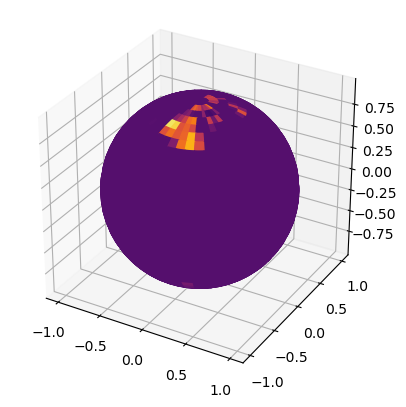

In [96]:
ice_time_grid.plot_step_on_sphere(0)
plt.show()

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_12268\3809651150.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


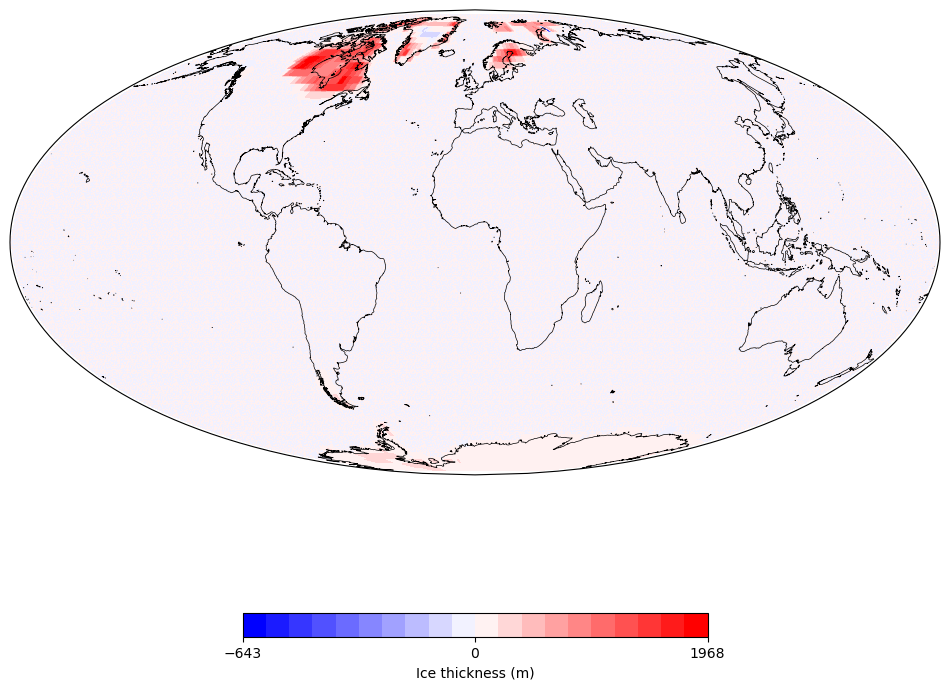

In [97]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors
ind=0
cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(ice_time_grid.height_time_grid[ind,:,:], origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([ice_time_grid.height_time_grid[ind,:,:].min(), 0, ice_time_grid.height_time_grid[ind,:,:].max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [98]:
fig.savefig('ice_interpolated.pdf')

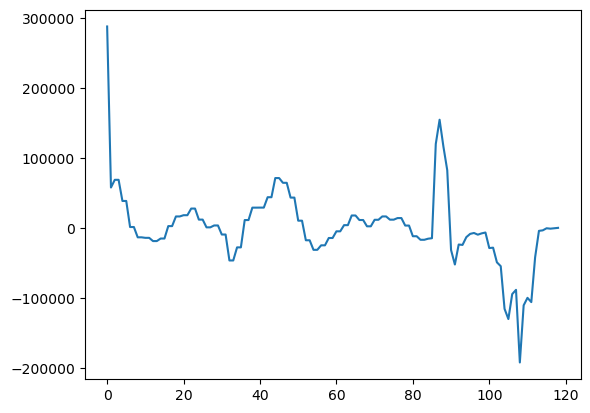

In [99]:
plt.plot(ice_time_grid.height_time_grid.sum(-1).sum(-1))

You can save the result of the interpolation in a Netcdf file. This way, you can reload it to avoid the computation time.

In [100]:
ice_time_grid.save()

In [101]:
ice_time_grid.time_step

array([120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108,
       107, 106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,
        94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,
        81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,
        68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,
        55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,
        42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,
        29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1])

In [102]:
ice_time_grid=TIME_GRID(from_file=(True,'ice_grid_64'))

In [103]:
ice_time_grid.time_step

array([120., 119., 118., 117., 116., 115., 114., 113., 112., 111., 110.,
       109., 108., 107., 106., 105., 104., 103., 102., 101., 100.,  99.,
        98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,  89.,  88.,
        87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,  79.,  78.,  77.,
        76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,  68.,  67.,  66.,
        65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,  57.,  56.,  55.,
        54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,  46.,  45.,  44.,
        43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,  35.,  34.,  33.,
        32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,  24.,  23.,  22.,
        21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,
        10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.],
      dtype=float32)

# Loading sediments

In [104]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt

In [105]:
data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/Irrawady_sedimentationgrid_2.mat') #load the file, can be modified to load an other file.
sed_grid=data['Sed_map_fin'][:,:-25]
sed_lon=data['lon'][:-25].squeeze()
sed_lat=data['lat'][:-25].squeeze()
sed_time=data['time'][0][::-1]
sed_grid=np.diff(sed_grid[::-1],axis=0)[::-1]

In [106]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=0,step=-step)
maxdeg=64 # define the maximum degree for spherical harmonics.

sed_time_grid=TIME_GRID(time_step,maxdeg,grid_name='sed_grid_64')

In [107]:
sed_time_grid.interp_on_time_and_space(sed_grid,sed_time,sed_lon,sed_lat,backend=True,grid_type='local')

interpolation number : 0
interpolation number : 1
interpolation number : 2
interpolation number : 3
interpolation number : 4
interpolation number : 5
interpolation number : 6
interpolation number : 7
interpolation number : 8
interpolation number : 9
interpolation number : 10
interpolation number : 11
interpolation number : 12
interpolation number : 13
interpolation number : 14
interpolation number : 15
interpolation number : 16
interpolation number : 17
interpolation number : 18
interpolation number : 19
interpolation number : 20
interpolation number : 21
interpolation number : 22
interpolation number : 23
interpolation number : 24
interpolation number : 25
interpolation number : 26
interpolation number : 27
interpolation number : 28
interpolation number : 29
interpolation number : 30
interpolation number : 31
interpolation number : 32
interpolation number : 33
interpolation number : 34
interpolation number : 35
interpolation number : 36
interpolation number : 37
interpolation number :

In [108]:
sed_time_grid.height_time_grid=sed_time_grid.height_time_grid=sed_time_grid.height_time_grid[:,::-1,:]# latitude are inverted ! 

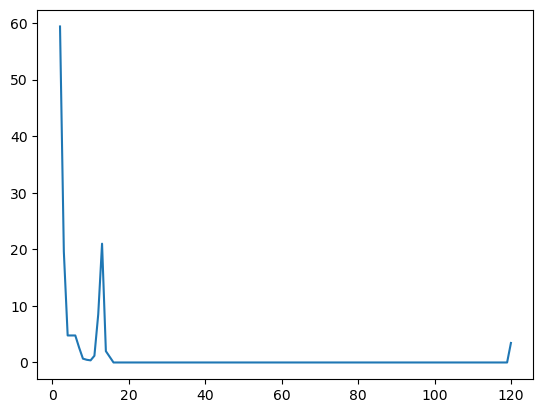

In [109]:
plt.plot(sed_time_grid.time_step[:-1],sed_time_grid.height_time_grid.sum(-1).sum(-1))

C:\Users\ahenry01\AppData\Local\Temp\ipykernel_12268\3559408362.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


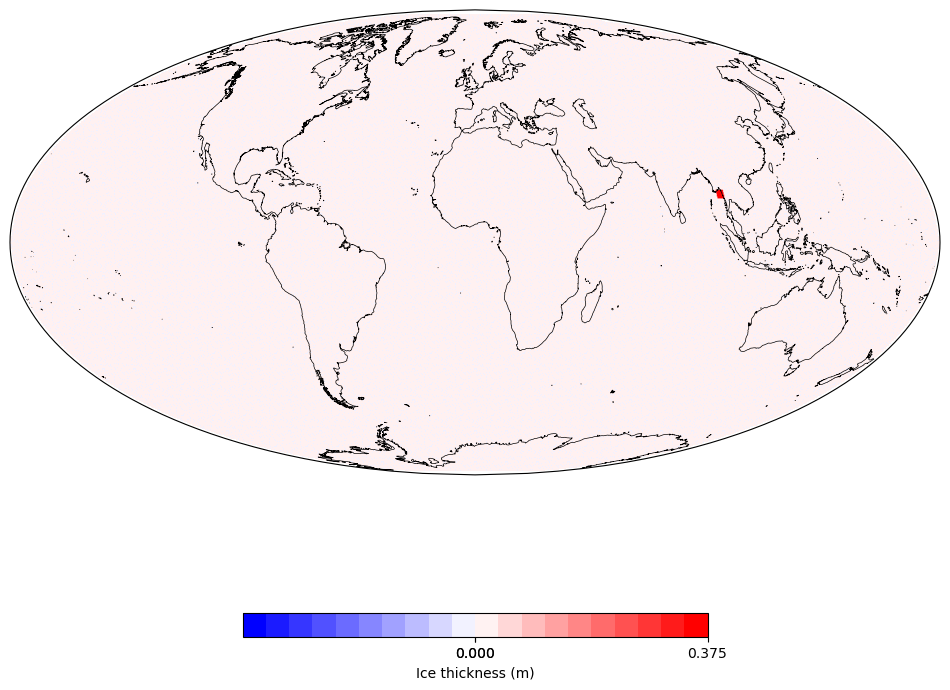

In [110]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

ind=110

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=-0.1,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(sed_time_grid.height_time_grid[ind,:,:], origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([sed_time_grid.height_time_grid[ind,:,:].min(), 0, sed_time_grid.height_time_grid[ind,:,:].max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [111]:
fig.savefig('sed_interpolated.pdf')

In [112]:
sed_time_grid.save()

# Loading Topography

In [113]:
from scipy import io
import numpy as np
from SL_C0de.grid import TIME_GRID
import matplotlib.pyplot as plt

In [114]:
data=io.loadmat('C:/Users/ahenry01/Desktop/Python_code/SL_C0de_data/topo_SL') #load the file, can be modified to load an other file.
# topo_grid=data['topo_bed'].copy(order='C')[::2,1::2].squeeze()
# topo_lat=data['lat_topo'].copy(order='C').squeeze()[::-2]
# topo_lon=data['lon_topo'].copy(order='C').squeeze()[1::2]
topo_grid=data['topo_bed'][::2,1::2].squeeze()
topo_lat=data['lat_topo'].squeeze()[::-2]
topo_lon=data['lon_topo'].squeeze()[1::2]

In [115]:
print(topo_grid.shape,topo_lat.shape,topo_lon.shape)

(360, 721) (360,) (721,)


C:\Users\ahenry01\AppData\Local\Temp\ipykernel_12268\4049442692.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


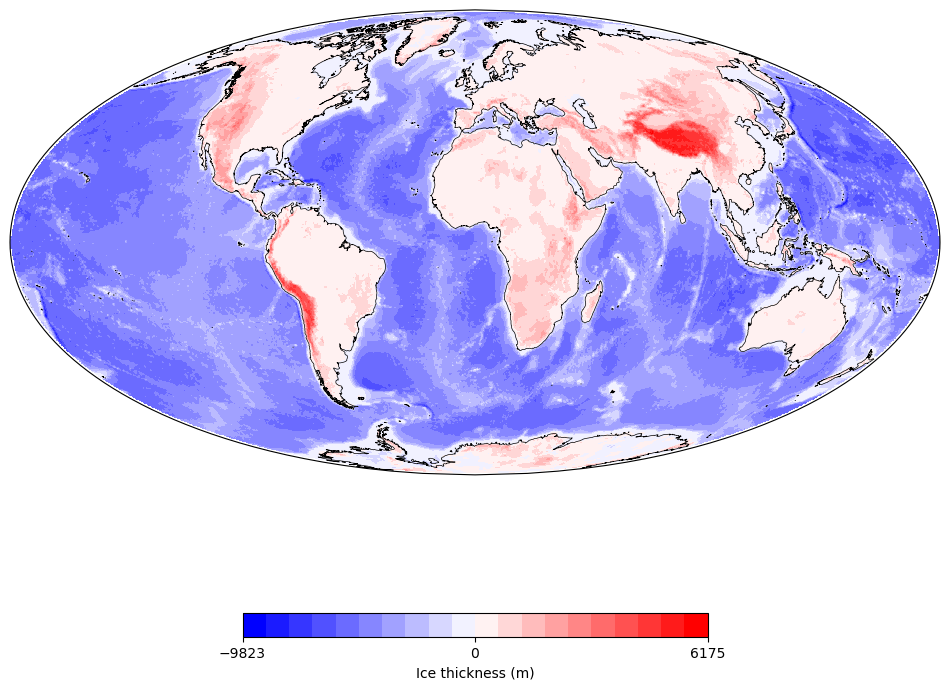

In [116]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(topo_grid, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([topo_grid.min(), 0, topo_grid.max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

In [117]:
stop=120 # define the number of time steps
step=1
time_step=np.arange(start=stop,stop=0,step=-step)
maxdeg=64 # define the maximum degree for spherical harmonics.

topo_time_grid=TIME_GRID(time_step,maxdeg,grid_name='topo_grid_64')

In [118]:
#topo_lon,topo_lat=np.meshgrid(topo_lon,topo_lat)
print('okey')
topo_time_grid.topo_pres=topo_time_grid.interp_on(topo_grid,topo_lon,topo_lat,grid_type='global')

okey


C:\Users\ahenry01\AppData\Local\Temp\ipykernel_12268\2400606591.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('bwr', 20)


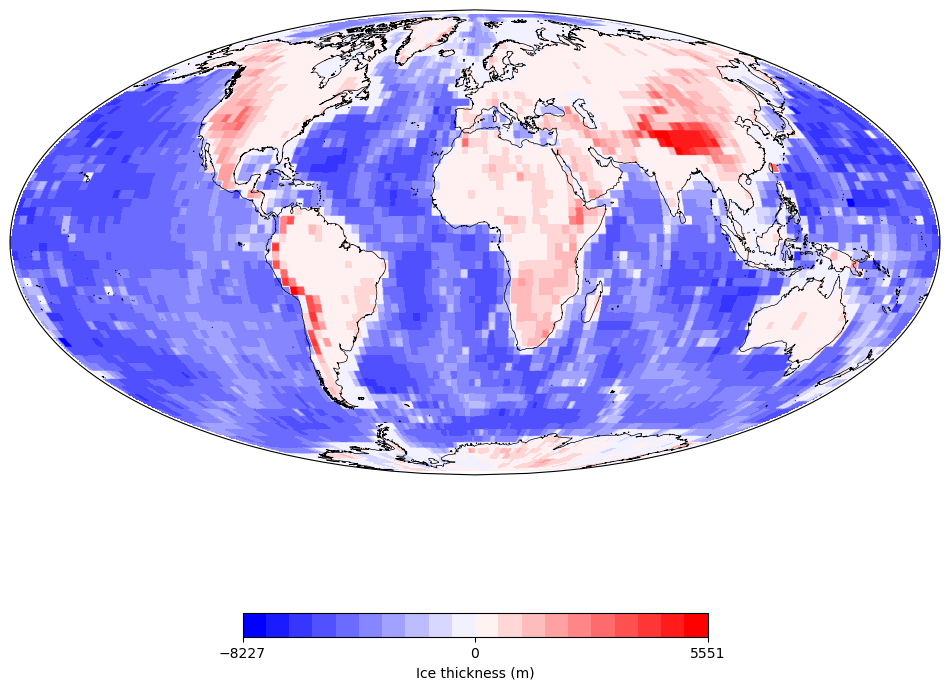

In [119]:
import cartopy
import cartopy.crs as ccrs
from matplotlib import cm
import matplotlib.colors as colors

cmap=cm.get_cmap('bwr', 20)
alpha_ocean=0
coast_line_width=0.5
norm = colors.TwoSlopeNorm(vmin=None,vmax=None,vcenter=0)

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.Mollweide())
ax.set_global()
colormap = cmap
m = ax.imshow(topo_time_grid.topo_pres, origin='lower', transform=ccrs.PlateCarree(),extent=[0,360, -89, 89], zorder=0, cmap=colormap, interpolation="gaussian",norm=norm)
cbar=plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5)
cbar.set_label('Ice thickness (m)')
cbar.set_ticks([topo_time_grid.topo_pres.min(), 0, topo_time_grid.topo_pres.max()])
ax.add_feature(cartopy.feature.OCEAN, alpha=alpha_ocean, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=coast_line_width)

# We need to update the topography integrate the ice and sediment variation

In [121]:
for i in range(topo_time_grid.time_step_number-1):
    if i==0:
        topo_time_grid.height_time_grid[i,:,:]=topo_time_grid.topo_pres-sed_time_grid.height_time_grid[0,:,:]-ice_time_grid.height_time_grid[0,:,:]
    else :
        topo_time_grid.height_time_grid[i,:,:]=topo_time_grid.topo_pres-sed_time_grid.height_time_grid[:i,:,:].sum(0)-ice_time_grid.height_time_grid[:i,:,:].sum(0)

In [122]:
topo_time_grid.save()